In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

In [46]:
data = pd.read_csv('model_data.csv', index_col='PID')
data.shape

(2579, 20)

#### Independent Variable (y)

In [47]:
y = data.SalePrice.copy()
data.drop('SalePrice', axis=1, inplace=True)

## 🤖 Prepare for SVRegression

In [48]:
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder

In [49]:
data_le = data.copy()
data_le.columns

Index(['MSSubClass', 'Foundation', 'PavedDrive', 'BsmtUnfSF', 'AllBathBsmt',
       'AllBathAbv', 'HeatingQC', 'Neighborhood', 'YearBuilt', 'GarageCars',
       'PorchArea', 'GoodLivArea', 'CentralAir', 'KitchenQual', 'ExterQual',
       'BsmtCond', 'FireplaceQu', 'GarageQual', 'HasPool'],
      dtype='object')

In [50]:
# Label CentralAir Y or N with 1 or 0
data_le.CentralAir = data_le.CentralAir.apply(lambda x: 1 if x=='Y' else 0, )

In [51]:
# Use LabelEncoder on Categorical features
le = LabelEncoder()
data_le.MSSubClass = le.fit_transform(data.MSSubClass)
#data_le.GarageType = le.fit_transform(data.GarageType)
data_le.Foundation = le.fit_transform(data.Foundation)
data_le.PavedDrive = le.fit_transform(data.PavedDrive)
data_le.Neighborhood = le.fit_transform(data.Neighborhood)
# Manually Encode Ordinal features
#data_le.BsmtQual = data_le.BsmtQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,np.NaN:0})
data_le.HeatingQC = data_le.HeatingQC.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_le.KitchenQual = data_le.KitchenQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_le.ExterQual = data_le.ExterQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_le.BsmtCond = data_le.BsmtCond.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'None':0})
data_le.FireplaceQu = data_le.FireplaceQu.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'None':0})
data_le.GarageQual = data_le.GarageQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'None':0})

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data_le, y, test_size=0.25)

In [53]:
svr = SVR()
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [54]:
svr.fit(X_train, np.log10(y_train))
svr.score(X_test, np.log10(y_test))

0.7688358720238083

In [77]:
train_R2 = []
test_R2 = []
epsilons = np.linspace(0.000001,0.2,50)

for eps in epsilons:
    svr.set_params(epsilon=eps)
    svr.fit(X_train, np.log10(y_train))
    train_R2.append(svr.score(X_train, np.log10(y_train)))
    test_R2.append(svr.score(X_test, np.log10(y_test)))

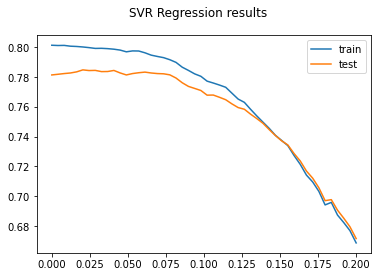

In [79]:
to_plot = pd.DataFrame([train_R2,test_R2]).T.set_index(epsilons).rename(columns={0:'train',1:'test'})

fig, ax = plt.subplots()
fig.suptitle('SVR Regression results')

for each in to_plot.columns:
    ax.plot(to_plot.index, to_plot[each], label=each)
    ax.legend(loc=1)

In [80]:
train_R2 = []
test_R2 = []
Cs = np.linspace(1,10000,50)

for c in Cs:
    svr.set_params(C=c)
    svr.fit(X_train, np.log10(y_train))
    train_R2.append(svr.score(X_train, np.log10(y_train)))
    test_R2.append(svr.score(X_test, np.log10(y_test)))

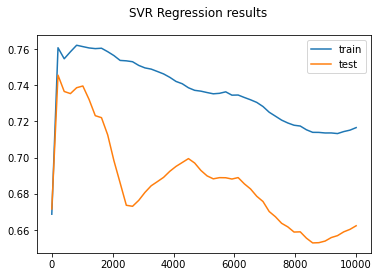

In [82]:
to_plot = pd.DataFrame([train_R2,test_R2]).T.set_index(Cs).rename(columns={0:'train',1:'test'})

fig, ax = plt.subplots()
fig.suptitle('SVR Regression results')

for each in to_plot.columns:
    ax.plot(to_plot.index, to_plot[each], label=each)
    ax.legend(loc=1)

In [86]:
grid_params = {
    'C': np.linspace(1,1000,20),    
    'epsilon': np.linspace(0.0000001,0.1,20)
}
grid = GridSearchCV(svr, grid_params, scoring='r2', cv=4)
grid.fit(X_train, np.log10(y_train))

GridSearchCV(cv=4, estimator=SVR(C=10000.0, epsilon=0.2),
             param_grid={'C': array([   1.        ,   53.57894737,  106.15789474,  158.73684211,
        211.31578947,  263.89473684,  316.47368421,  369.05263158,
        421.63157895,  474.21052632,  526.78947368,  579.36842105,
        631.94736842,  684.52631579,  737.10526316,  789.68421053,
        842.26315789,  894.84210526,  947.42105263, 1000.        ]),
                         'epsilon': array([1.00000000e-07, 5.26325263e-03, 1.05264053e-02, 1.57895579e-02,
       2.10527105e-02, 2.63158632e-02, 3.15790158e-02, 3.68421684e-02,
       4.21053211e-02, 4.73684737e-02, 5.26316263e-02, 5.78947789e-02,
       6.31579316e-02, 6.84210842e-02, 7.36842368e-02, 7.89473895e-02,
       8.42105421e-02, 8.94736947e-02, 9.47368474e-02, 1.00000000e-01])},
             scoring='r2')

In [88]:
print(grid.best_estimator_)
print(grid.score(X_test, np.log10(y_test)))

SVR(C=1000.0, epsilon=1e-07)
0.8444165350557415


In [ ]:
# increase ranges of param tuning
grid_params = {
    'C': np.linspace(10000,100000,4),    
    'epsilon': np.linspace(0.0000001,0.1,4)
}
grid = GridSearchCV(svr, grid_params, scoring='r2', cv=4)
grid.fit(X_train, np.log10(y_train))